In [2]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the dataset
df = pd.read_csv('breast-cancer-wisconsin-dataset.csv')
df = df.drop(['id'], axis = 1)

#Defining the dataset
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

#Convert 'M' and 'B' to numeric (0,1)
lb = LabelEncoder()
y =  lb.fit_transform(y)
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

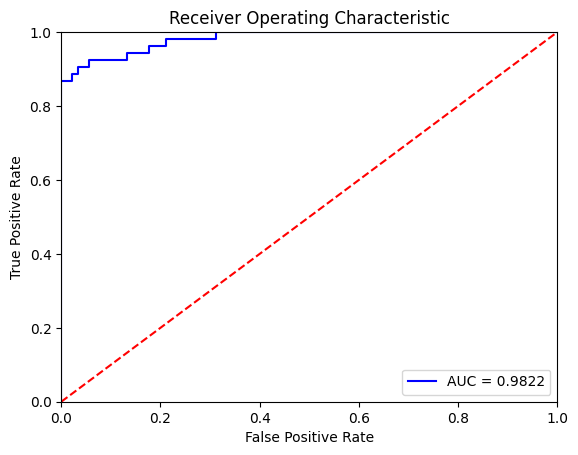

In [6]:
#linear SVM
linear_svm = SVC(C= 15, probability= True)
linear_svm.fit(X_train, y_train)
k_fold = KFold (n_splits = 5)

probs = linear_svm.predict_proba (X_test)
pred = probs [:,1]
fpr, tpr, threshold = roc_curve (y_test, pred)
roc_auc = auc (fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend (loc= 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [8]:
linearsvm_scores = cross_val_score (linear_svm, X, y, cv = k_fold)
print('Cross-Validation Score is: ',linearsvm_scores)
print('Mean Cross-Validation Score is : ',linearsvm_scores.mean())


Cross-Validation Score is:  [0.85087719 0.90350877 0.97368421 0.95614035 0.92920354]
Mean Cross-Validation Score is :  0.9226828132277598


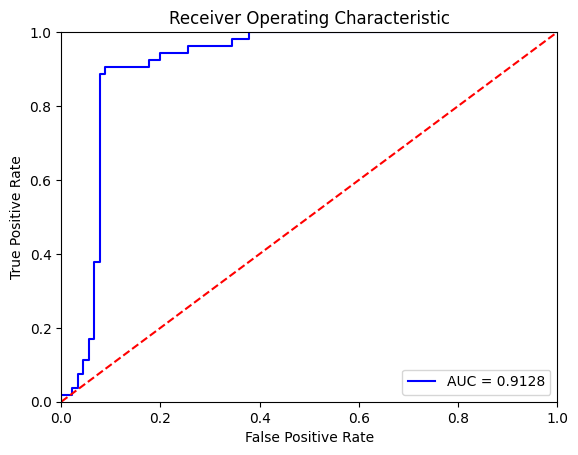

In [9]:
#RBF SVM
rbf_svm = SVC(kernel = 'rbf', C = 100, gamma = 0.01, probability=True)
rbf_svm.fit(X_train, y_train)
probs = rbf_svm.predict_proba(X_test)
pred = probs [:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend (loc= 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [10]:
rbfsvm_scores = cross_val_score (rbf_svm, X, y, cv = k_fold)
print('Cross-Validation Score is: ',rbfsvm_scores)
print('Mean Cross-Validation Score is : ',rbfsvm_scores.mean())


Cross-Validation Score is:  [0.4122807  0.57894737 0.64912281 0.75438596 0.76106195]
Mean Cross-Validation Score is :  0.6311597578015836


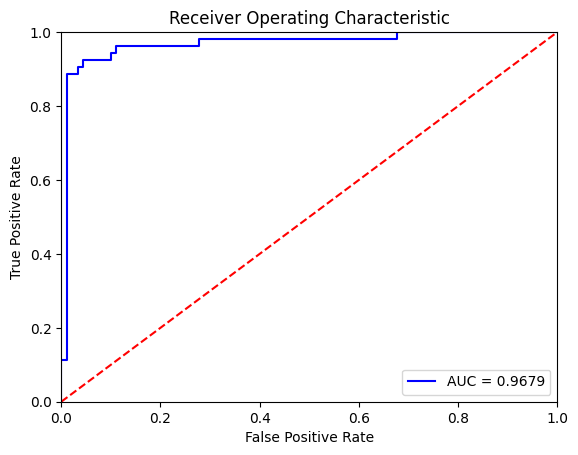

In [11]:
#RBF SVM
rbf1_svm = SVC(kernel = 'rbf', C = 100, gamma = 0.0001, probability=True)
rbf1_svm.fit(X_train, y_train)
probs = rbf1_svm.predict_proba(X_test)
pred = probs [:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend (loc= 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [12]:
rbf1svm_scores = cross_val_score (rbf1_svm, X, y, cv = k_fold)
print('Cross-Validation Score is: ',rbf1svm_scores)
print('Mean Cross-Validation Score is : ',rbf1svm_scores.mean())


Cross-Validation Score is:  [0.92105263 0.94736842 0.93859649 0.96491228 0.90265487]
Mean Cross-Validation Score is :  0.9349169383636081


Inference: Linear SVM (AUC = 0.9835) works well as compared to
RBF SVM with gamma = 0.01 (AUC = 0.9054) and
RBF SVM with gamma = 0.0001 (AUC = 0.9581)
because, linear SVM is a simplest form of separating data
whereas RBF SVM is works well in complex dataset